#Student ID: 2202100



####Install package

In [1]:
#!pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.8 MB/s eta 0:00:00


####Import libraries

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
import contractions
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import one_hot
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Flatten, Dense

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


####Set same seeds for all libraries

In [3]:
student_id = 2202100
np.random.seed(student_id)

#Common Codes

####Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


####Set Google Drive path

In [5]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id)) 
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['test.csv', 'train.csv', 'models', 'valid.csv', 'train_25.csv', 'train_50.csv', 'train_100.csv', 'train_75.csv']


####Set variables for respective file paths

In [6]:
# Add your code to initialize GDrive and data and models paths

# TODO: Fill in the Google Drive path where you uploaded the assignment, data and code
# Example: If your student_id is 1234567 then your directory will be './CE807/Assignment2/1234567/' 

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)

valid_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Valid file: ', valid_file)

MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50') # Model 1 trained using 50% of train data directory
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)

model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 50% of train data 
print('Output file name using model 1 using 50% of train data: ',model_1_50_output_test_file)

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75') # Model 1 trained using 75% of train data directory
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)

model_1_75_output_test_file = os.path.join(MODEL_1_75_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 75% of train data 
print('Output file name using model 1 using 75% of train data: ',model_1_75_output_test_file)

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100') # Model 1 trained using 100% of train data directory
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)

model_1_100_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 100% of train data 
print('Output file name using model 1 using 100% of train data: ',model_1_100_output_test_file)


MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 2 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 2 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_25_output_test_file)

MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50') # Model 2 trained using 50% of train data directory
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)

model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 50% of train data 
print('Output file name using model 1 using 50% of train data: ',model_1_50_output_test_file)

MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75') # Model 2 trained using 75% of train data directory
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)

model_2_75_output_test_file = os.path.join(MODEL_2_75_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 75% of train data 
print('Output file name using model 2 using 75% of train data: ',model_2_75_output_test_file)

MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100') # Model 2 trained using 100% of train data directory
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)

model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 100% of train data 
print('Output file name using model 2 using 100% of train data: ',model_2_100_output_test_file)

Train file:  gdrive/MyDrive/./CE807/Assignment2/2202100/train.csv
Test file:  gdrive/MyDrive/./CE807/Assignment2/2202100/test.csv
Valid file:  gdrive/MyDrive/./CE807/Assignment2/2202100/valid.csv
Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/25
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/25/output_test.csv
Model 1 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/50
Output file name using model 1 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/50/output_test.csv
Model 1 directory with 75% data:  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/75
Output file name using model 1 using 75% of train data:  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/75/output_test.csv
Model 1 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2202100/mod

####Read Train file

In [7]:
train_df = pd.read_csv(train_file)
train_df.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


####Read Validation file

In [8]:
valid_df = pd.read_csv(valid_file)
valid_df.head()

,id,tweet,label
0,12476,@USER @USER @USER Trump is declassifying infor...,NOT
1,23242,@USER Ha even with them trying to rig the syst...,NOT
2,97885,@USER @USER @USER Man you really thought this ...,NOT
3,43414,@USER Ms. Clinton - you are a class act. My re...,OFF
4,81403,@USER It’s still here at 753. If someone did t...,NOT


####Read Test file

In [9]:
test_df = pd.read_csv(test_file)
test_df.head()

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF


In [10]:
print('Train data count: '+str(train_df.shape[0]))
print('Valid data count: '+str(valid_df.shape[0]))
print('Test data count: '+str(test_df.shape[0]))

Train data count: 12313
Valid data count: 927
Test data count: 860


##Data Visualization

#### Function to plot graph to display distribution of tweet

In [11]:
def plot_tweet_length_distribution(df, labelname):
    # Get tweet lengths for the given label
    tweet_lengths = [len(tweet) for tweet in df['tweet']]

    # Create a histogram plot with seaborn
    sns.histplot(tweet_lengths, kde=True, label=labelname)

    # Set plot labels and title
    plt.xlabel('Tweet Length')
    plt.ylabel('Count')
    plt.title('Distribution of Tweet Lengths for '+labelname+' data')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

#### Plot graph for train_df,valid_df,test_df to show distribution of tweet 

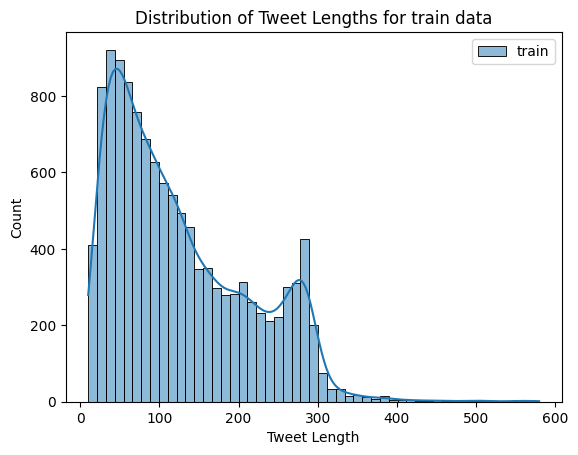

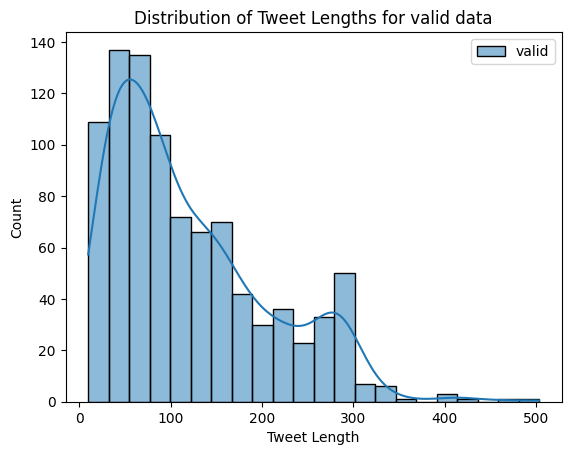

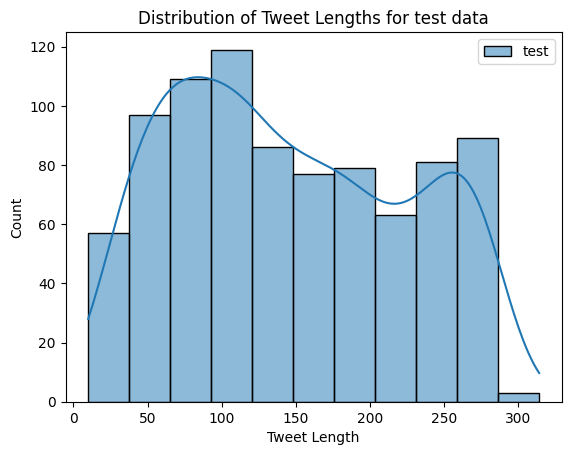

In [12]:
plot_tweet_length_distribution(train_df,labelname='train')
plot_tweet_length_distribution(valid_df,labelname='valid')
plot_tweet_length_distribution(test_df,labelname='test')

 #### Function to convert label column values to numerical

In [13]:
 # Define a mapping dictionary for label values
def convert_label_to_binary(df):    
  label_mapping = {'NOT': 0, 'OFF': 1}

  # Apply the mapping to the label column
  df['label'] = df['label'].map(label_mapping)




#### Convert label column to numerical for train_df,valid_df and test_df

In [14]:
convert_label_to_binary(train_df)
convert_label_to_binary(valid_df)
convert_label_to_binary(test_df)

0 and 1 count in train data

In [15]:
train_df['label'].value_counts()

0    8221
1    4092
Name: label, dtype: int64

0 and 1 count in train data

In [16]:
valid_df['label'].value_counts()

0    619
1    308
Name: label, dtype: int64

####0 and 1 count in test set

In [17]:
test_df['label'].value_counts()

0    620
1    240
Name: label, dtype: int64

#### Function to plot graph to show label counts

In [18]:
def plot_label_count(df,titlename):
    # Create a countplot with hue
    sns.countplot(data=df, x='label', hue='label')

    # Set plot labels and title
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Label Count for '+titlename)

    # Show the plot
    plt.show()

#### Plot bar graph to show label counts

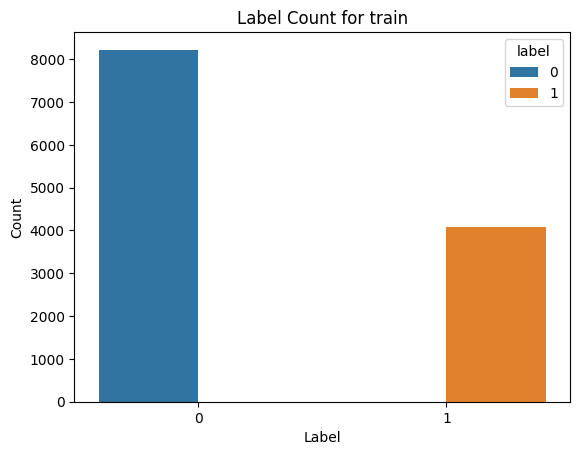

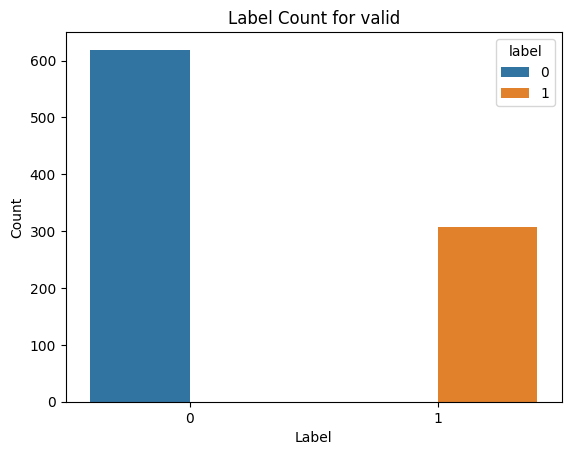

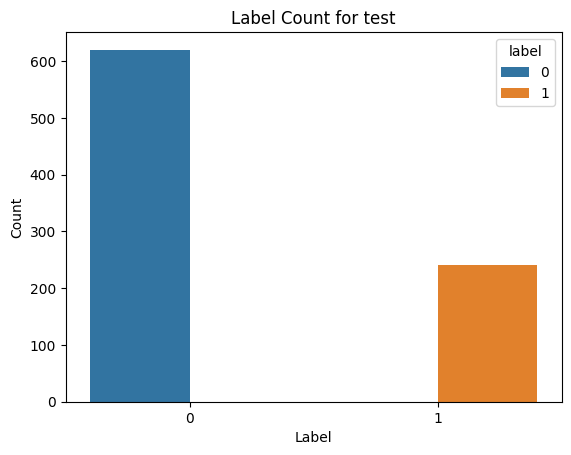

In [19]:
plot_label_count(train_df,titlename='train')
plot_label_count(valid_df,titlename='valid')
plot_label_count(test_df,titlename='test')

####Plot to show most frequently used words

In [20]:
def plot_most_frequent_words(df,n,dfname):
    # Get the n most frequent words and their counts from the specified column
    words_counts = Counter(df['tweet'].str.split().sum()).most_common(n)
    words, counts = zip(*words_counts)

    # Calculate the size of the plot based on the number of bars
    fig_width = 0.5 * len(words)
    fig_height = max(6, 0.8 * len(words))

    # Create a bar chart
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    ax.bar(words, counts, width=0.8)

    # Add annotations to the bars
    for i, count in enumerate(counts):
        ax.annotate(count, xy=(words[i], count), ha='center', va='bottom', fontsize=8)

    ax.set(title=f'({n} words) Most Frequent Words for {dfname} ', xlabel='Words', ylabel='Most frequent word count')
    ax.tick_params(axis='x', labelsize=8, rotation=45)

    # Display the plot
    plt.show()

####Call function to display most frequently used words 

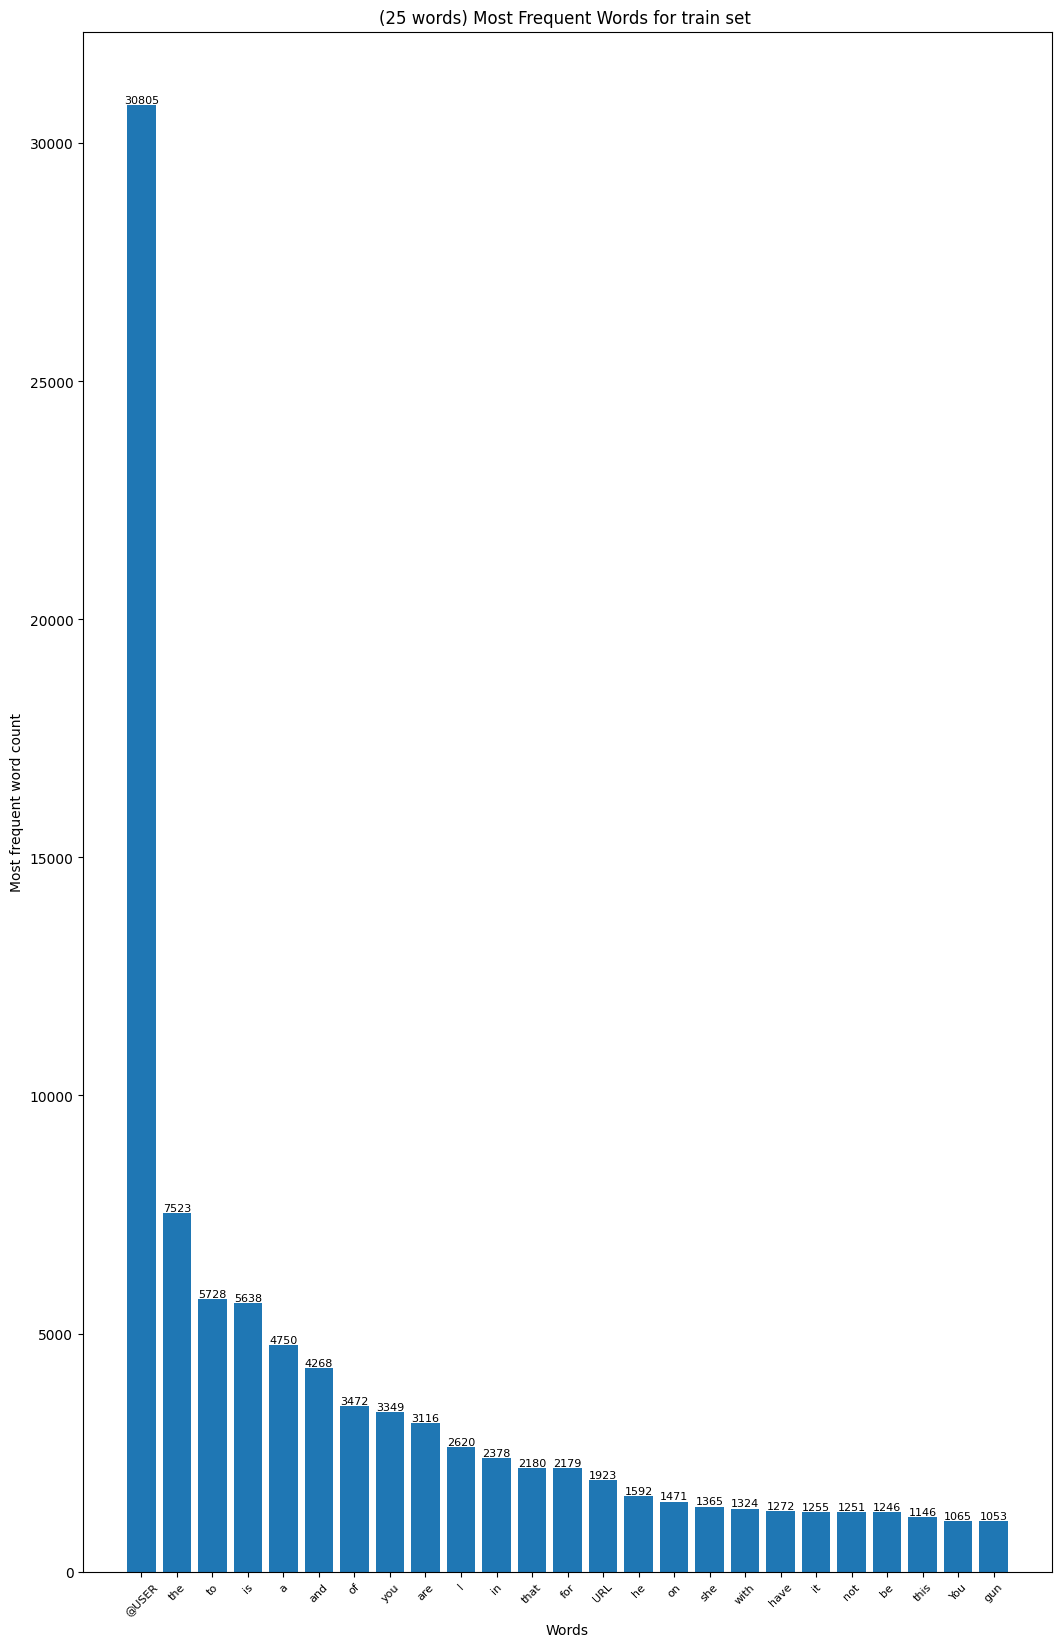

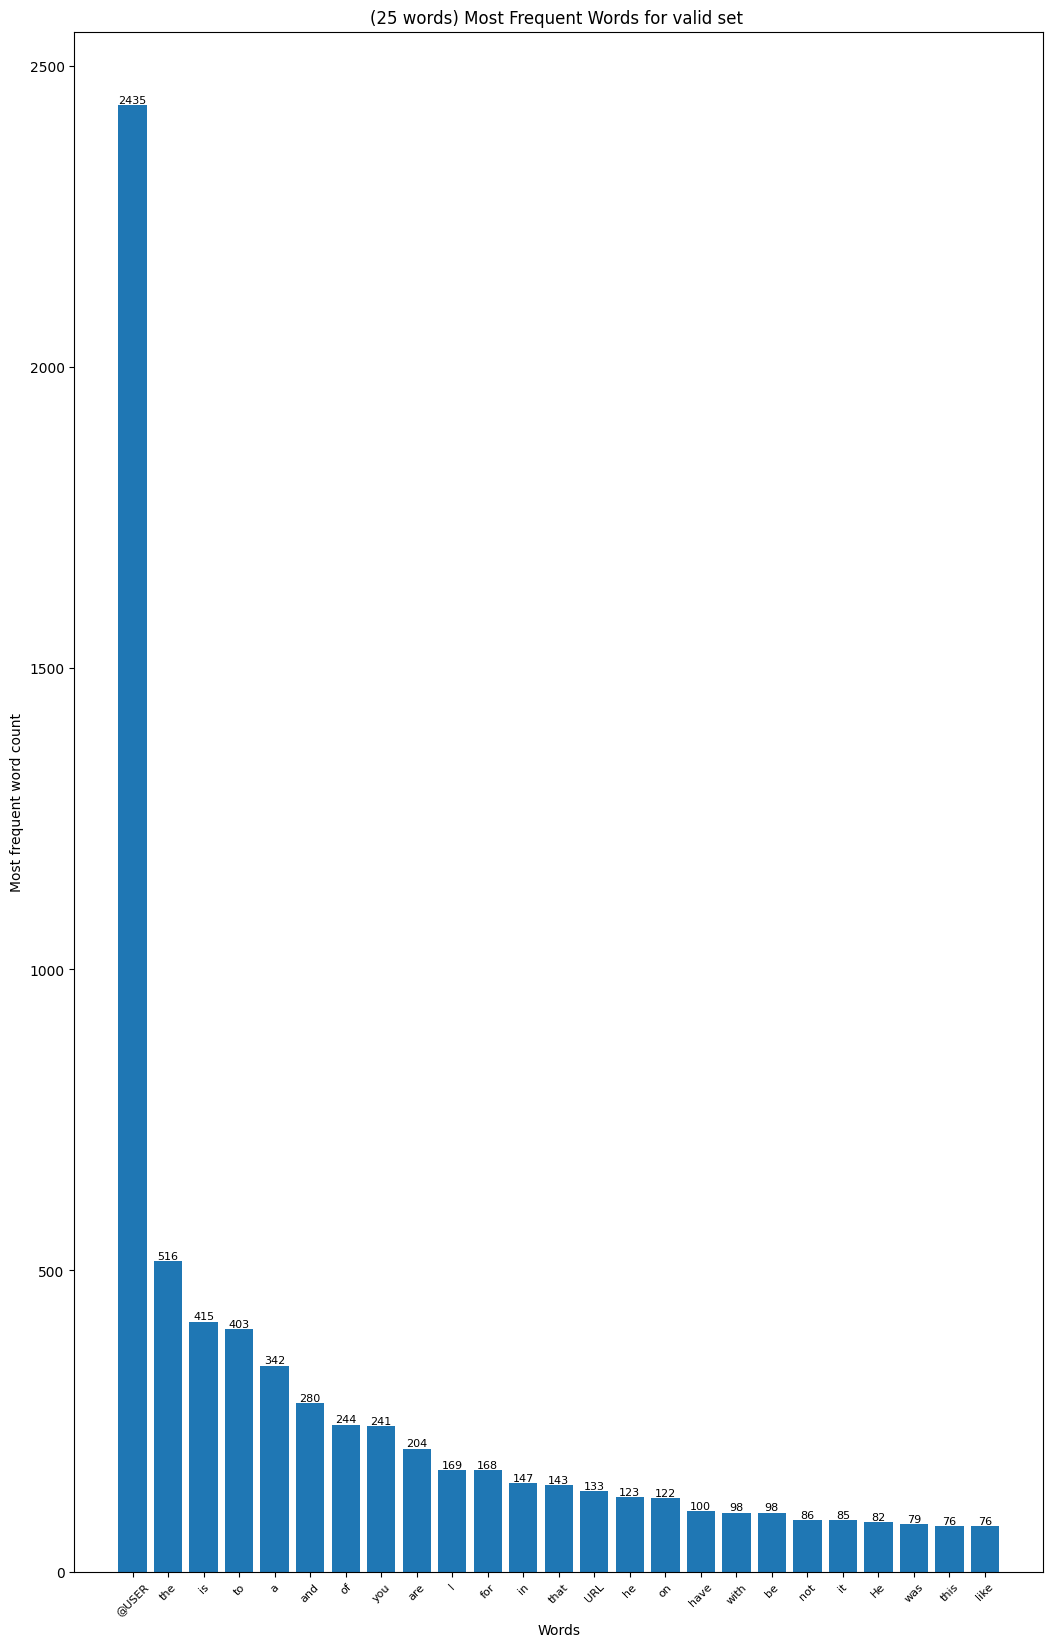

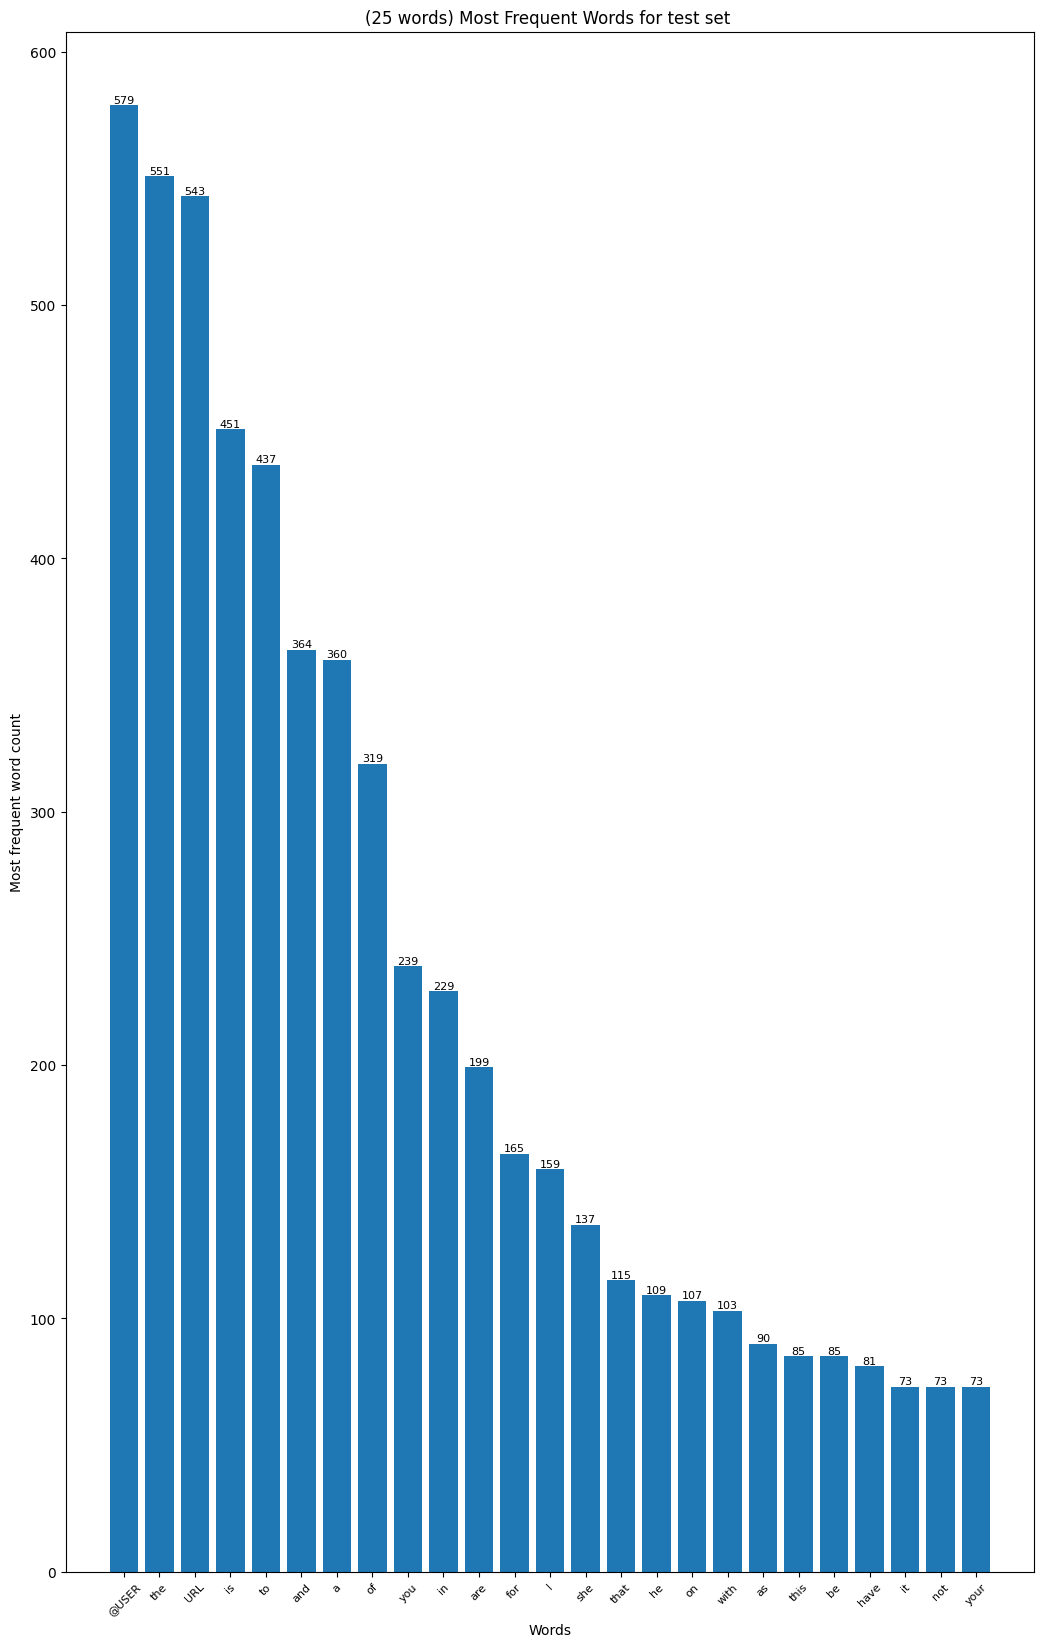

In [21]:
plot_most_frequent_words(train_df,25,dfname='train set')
plot_most_frequent_words(valid_df,25,dfname='valid set')
plot_most_frequent_words(test_df,25,dfname='test set')

#### Function to split data each having 25% data of original dataset

In [22]:
def split_data(df,seed_val):
  X1, X2 = train_test_split(df, test_size=0.5, random_state=seed_val, stratify=df['label'])
  X1_25, X2_25 = train_test_split(X1, test_size=0.5, random_state=seed_val, stratify=X1['label'])
  X3_25, X4_25 = train_test_split(X2, test_size=0.5, random_state=seed_val, stratify=X2['label']) 
  return X1_25, X2_25,X3_25,X4_25

####Set the split data to 4 variables

In [23]:
X1_25,X2_25,X3_25,X4_25=split_data(train_df,student_id)
# Check the number of samples in X1_25 and X2_25
print('Count of rows in 1st part: '+str(X1_25.shape[0]))
print('Count of rows in 2nd part: '+str(X2_25.shape[0]))
print('Count of rows in 3rd part: '+str(X3_25.shape[0])) 
print('Count of rows in 4th part: '+str(X4_25.shape[0]))

Count of rows in 1st part: 3078
Count of rows in 2nd part: 3078
Count of rows in 3rd part: 3078
Count of rows in 4th part: 3079


####Write data to CSV files and save in Google drive

In [24]:
train_25_path=GOOGLE_DRIVE_PATH+'/train_25.csv'#Set 25% data file path
X1_25.to_csv(train_25_path, index=False)#Write 25% data to csv

train_50_path=GOOGLE_DRIVE_PATH+'/train_50.csv'#Set 50% data file path
X_50 = pd.concat([X1_25, X2_25], axis=0)# Concatenate X1_25 and X2_25 
X_50.to_csv(train_50_path, index=False)#Write 50% data to csv

train_75_path=GOOGLE_DRIVE_PATH+'/train_75.csv'#Set 75% data file path
X_75 = pd.concat([X_50, X3_25], axis=0)# Concatenate X_50 and X3_25 
X_75.to_csv(train_75_path, index=False)#Write 75% data to csv

train_100_path=GOOGLE_DRIVE_PATH+'/train_100.csv'#Set 100% data file path
X_100 = pd.concat([X_75, X4_25], axis=0)# Concatenate X_75 and X4_25
X_100.to_csv(train_100_path, index=False)#Write 100% data to csv

####Data Cleaning and preprocessing

In [25]:
#Function to preprocess data
def clean_text(text):
  # Expand contractions
  text = contractions.fix(text)

  # Remove special characters and digits
  text = re.sub('[^A-Za-z]+', ' ', text)

  # Convert text to lowercase
  text = text.lower()

  # Remove stop words
  stopwords = set(nltk.corpus.stopwords.words('english'))
  words = [word for word in text.split() if word not in stopwords]
  text = ' '.join(words)

   # Lemmatize words
  lemmatizer = nltk.WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in text.split()]
  text = ' '.join(words)
  
  return text

####Encode and pad

In [26]:
def encode_and_pad(dataset, max_length, vocabulary_size):
    # Encode each sentence in the corpus using one_hot
    onehot_repr = [one_hot(words, vocabulary_size) for words in dataset]
    
    # Pad each encoded sentence with 0s to ensure uniform length
    embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=max_length)
    
    # Convert the embedded docs to a numpy array and return it
    return np.array(embedded_docs)

####Prepare dataset

In [27]:
def prepare_dataset(data, Tfidf_vectorizer=None, split='test'):
  if split == 'train':
    data['tweet'] = data['tweet'].map(lambda t: clean_text(t))
    tweet_list = data["tweet"].tolist()
    Tfidf_vectorizer = TfidfVectorizer()
    vec_values = Tfidf_vectorizer.fit_transform(tweet_list).toarray()
    values = encode_and_pad(tweet_list, max_length=100, vocabulary_size=5000)  
  else:
    data['tweet'] = data['tweet'].map(lambda t: clean_text(t))
    tweet_list = data["tweet"].tolist()
    vec_values = Tfidf_vectorizer.transform(tweet_list).toarray()
    values = encode_and_pad(tweet_list, max_length=100, vocabulary_size=5000)    
    
  if split == 'train':
      return values, Tfidf_vectorizer
  else:
      return values

####Compute Performance

In [28]:
def compute_performance(y_true, y_pred, split='test'):
    print('Computing different performance metrics on', split, 'set of Dataset')
    f1score = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print('F1 Score(macro): ', f1score)
    print('Accuracy: ', acc)
    print('Confusion Matrix:')
    print(cm)
    
    return f1score

# Method 1 Start

####Train model 1

In [29]:
def train_model1(text_vector, label, val_values, val_label):
  vector_features = 40
  vocabulary_size = 5000
  max_length = 100
  model1=Sequential()
  model1.add(Embedding(vocabulary_size,vector_features,input_length=max_length))
  model1.add(Bidirectional(LSTM(100)))
  model1.add(Dropout(0.5))
  model1.add(Dense(1,activation='sigmoid'))
  optimizer = Adam('learning_rate=0.005')
  model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  print(model1.summary())

  model1.fit(text_vector,label,validation_data=(val_values,val_label),epochs=10,batch_size=64)

  return model1

####Save model

In [30]:
def save_model(model, vectorizer, model_dir):
    # save the model to disk
    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(model, open(model_file, 'wb'))
    print('Saved model to ', model_file)

    vectorizer_file = os.path.join(model_dir, 'vectorizer.sav') 
    pickle.dump(vectorizer, open(vectorizer_file, 'wb'))
    print('Saved Vectorizer to ', vectorizer_file)

    return model_file, vectorizer_file

####Load model



In [31]:
def load_model(model_file, vectorizer_file):
    # load model and vectorizer from disk

    model = pickle.load(open(model_file, 'rb'))

    print('Loaded model from ', model_file)

    vectorizer = pickle.load(open(vectorizer_file, 'rb'))

    print('Loaded Vectorizer from ', vectorizer_file)


    return model, vectorizer

#Train Method 1

In [32]:
def train_method1(train_file, val_file, model_dir):
  train_df = pd.read_csv(train_file)
  val_df = pd.read_csv(val_file)
  #Get train df label column
  train_label = train_df['label']
  # Get val df label column
  val_df['label'] = val_df['label'].replace({'NOT': 0, 'OFF': 1}).values
  val_label=val_df['label']

  train_values, count_vectorizer = prepare_dataset(train_df, split='train') 
  val_values= prepare_dataset(val_df,count_vectorizer)

  model = train_model1(train_values,train_label,val_values,val_label)

  model_file, vectorizer_file = save_model(model, count_vectorizer, model_dir)

  train_pred_label = np.round(model.predict(train_values))
  val_pred_label = np.round(model.predict(val_values))
  train_unique_labels = np.unique(train_pred_label)
  val_unique_labels = np.unique(val_pred_label)

  print("Unique predicted labels for train set:", train_unique_labels)
  print("Unique predicted labels for validation set:", val_unique_labels)
  # print('Train Split')
  train_f1_score = compute_performance(train_label, train_pred_label, split='train')

  # print('Validation Split')
  val_f1_score = compute_performance(val_label, val_pred_label, split='valid')


  return model_file, vectorizer_file

In [33]:
model_25_file, vectorizer_25_file=train_method1(train_25_path, valid_file, MODEL_1_25_DIRECTORY)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 40)           200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
49/49 [==============================] - 24s 354ms/step - loss: 0.6400 - accuracy: 0.6634 - val_loss

In [34]:
model_50_file, vectorizer_50_file=train_method1(train_50_path, valid_file, MODEL_1_50_DIRECTORY)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 40)           200000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
97/97 [==============================] - 34s 308ms/step - loss: 0.6297 - accuracy: 0.6670 - val_lo

In [35]:
model_75_file, vectorizer_75_file=train_method1(train_75_path, valid_file, MODEL_1_75_DIRECTORY)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 40)           200000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
145/145 [==============================] - 52s 323ms/step - loss: 0.6194 - accuracy: 0.6719 - val_

In [36]:
model_100_file, vectorizer_100_file=train_method1(train_100_path, valid_file, MODEL_1_100_DIRECTORY)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 40)           200000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
193/193 [==============================] - 64s 304ms/step - loss: 0.6015 - accuracy: 0.6887 - val_

## Testing code

In [37]:
def test_method1(test_file, model_file, vectorizer_file, output_dir):
  test_data = pd.read_csv(test_file)

  #Get test df label column
  test_data['label'] = np.where(test_data['label'] == 'NOT', 0, 1)
  test_label=test_data['label']

  # Load the model and vectorizer
  model, vectorizer = load_model(model_file, vectorizer_file) 

  # Clean the data
  test_values= prepare_dataset(test_data,vectorizer)

  # Test prediction label
  test_pred_label = np.round(model.predict(test_values))

  # Evaluate
  test_f1_score = compute_performance(test_label, test_pred_label, split='train')

  # Storing the predictions
  test_data['out_label']  = test_pred_label # Note how this is saved 

  out_file = os.path.join(output_dir, 'output_test.csv')

  # Converting the label field numeric values back into OFF and NOT
  test_data['label'] = np.where(test_data['label'] == 0, 'NOT', 'OFF')
  test_data['out_label'] = np.where(test_data['out_label'] == 0, 'NOT', 'OFF')

  print('Saving model output to', out_file)
  test_data.to_csv(out_file)


####Test for 25% data

In [38]:
print('Testing using model trained on 25% data')
test_method1(test_file, model_25_file, vectorizer_25_file, MODEL_1_25_DIRECTORY)

Testing using model trained on 25% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/25/vectorizer.sav
27/27 [==============================] - 5s 91ms/step
Computing different performance metrics on train set of Dataset
F1 Score(macro):  0.6076247921741484
Accuracy:  0.6569767441860465
Confusion Matrix:
[[435 185]
 [110 130]]
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/25/output_test.csv


####Test for 50% data

In [39]:
print('Testing using model trained on 50% data')
test_method1(test_file, model_50_file, vectorizer_50_file, MODEL_1_50_DIRECTORY)

Testing using model trained on 50% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/50/vectorizer.sav
27/27 [==============================] - 2s 36ms/step
Computing different performance metrics on train set of Dataset
F1 Score(macro):  0.6358404523423862
Accuracy:  0.6872093023255814
Confusion Matrix:
[[457 163]
 [106 134]]
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/50/output_test.csv


####Test for 75% data

In [40]:
print('Testing using model trained on 75% data')
test_method1(test_file, model_75_file, vectorizer_75_file, MODEL_1_75_DIRECTORY)

Testing using model trained on 75% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/75/vectorizer.sav
27/27 [==============================] - 2s 35ms/step
Computing different performance metrics on train set of Dataset
F1 Score(macro):  0.6511627906976745
Accuracy:  0.7069767441860465
Confusion Matrix:
[[476 144]
 [108 132]]
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/75/output_test.csv


####Test for 100% data

In [41]:
print('Testing using model trained on 75% data')
test_method1(test_file, model_100_file, vectorizer_100_file, MODEL_1_100_DIRECTORY)

Testing using model trained on 75% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/100/vectorizer.sav
27/27 [==============================] - 2s 39ms/step
Computing different performance metrics on train set of Dataset
F1 Score(macro):  0.6769481197044952
Accuracy:  0.7383720930232558
Confusion Matrix:
[[505 115]
 [110 130]]
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2202100/models/1/100/output_test.csv


####Train model 2

In [42]:
# Define the CNN model architecture
def trainmodel2(text_vector, label, val_values, val_label):  
  model2 = Sequential()
  vocabulary_size = 5000
  max_tweet_length = 100
  model2.add(Embedding(vocabulary_size, 32, input_length=max_tweet_length))
  model2.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
  model2.add(MaxPooling1D(pool_size=2))
  model2.add(Dropout(0.2))
  model2.add(Flatten())
  model2.add(Dense(1, activation='sigmoid'))
  print(model2.summary())
  # Compile the model
  model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model
  model2.fit(text_vector,label,validation_data=(val_values,val_label),epochs=10,batch_size=64)
  return model2


##Training Method 2

In [43]:
def train_method2(train_file, val_file, model_dir):
  train_df = pd.read_csv(train_file)
  val_df = pd.read_csv(val_file)
  #Get train df label column
  train_label = train_df['label']
  # Get val df label column
  val_df['label'] = val_df['label'].replace({'NOT': 0, 'OFF': 1})
  val_label=val_df['label']

  train_values, count_vectorizer = prepare_dataset(train_df, split='train') 
  val_values= prepare_dataset(val_df,count_vectorizer)

  model2 = trainmodel2(train_values,train_label,val_values,val_label)

  model_file, vectorizer_file = save_model(model2, count_vectorizer, model_dir)

  train_pred_label = np.round(model2.predict(train_values))
  val_pred_label = np.round(model2.predict(val_values))
  train_unique_labels = np.unique(train_pred_label)
  val_unique_labels = np.unique(val_pred_label)

  print("Unique predicted labels for train set:", train_unique_labels)
  print("Unique predicted labels for validation set:", val_unique_labels)
  # print('Train Split')
  train_f1_score = compute_performance(train_label, train_pred_label, split='train')

  # print('Validation Split')
  val_f1_score = compute_performance(val_label, val_pred_label, split='valid')


  return model_file, vectorizer_file

In [44]:
model_25_file, vectorizer_25_file=train_method2(train_25_path, valid_file, MODEL_2_25_DIRECTORY)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 98, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 dropout_4 (Dropout)         (None, 49, 32)            0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1569      
                                                      

In [45]:
model_50_file, vectorizer_50_file=train_method2(train_50_path, valid_file, MODEL_2_50_DIRECTORY)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 32)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 49, 32)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 49, 32)            0         
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1569      
                                                      

In [46]:
model_75_file, vectorizer_75_file=train_method2(train_75_path, valid_file, MODEL_2_75_DIRECTORY)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 98, 32)            3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 49, 32)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 49, 32)            0         
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                 1569      
                                                      

In [47]:
model_100_file, vectorizer_100_file=train_method2(train_100_path, valid_file, MODEL_2_100_DIRECTORY)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 32)           160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 98, 32)            3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 49, 32)           0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 49, 32)            0         
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 1569      
                                                      

In [48]:
def test_method2(test_file, model_file, vectorizer_file, output_dir):
  test_data = pd.read_csv(test_file)

  #Get test df label column
  test_data['label'] = np.where(test_data['label'] == 'NOT', 0, 1)
  test_label=test_data['label']

  # Load the model and vectorizer
  model, vectorizer = load_model(model_file, vectorizer_file) 

  # Clean the data
  test_values= prepare_dataset(test_data,vectorizer)

  # Test prediction label
  test_pred_label = np.round(model.predict(test_values))

  # Evaluate
  test_f1_score = compute_performance(test_label, test_pred_label, split='train')

  # Storing the predictions
  test_data['out_label']  = test_pred_label # Note how this is saved 

  out_file = os.path.join(output_dir, 'output_test.csv')

  # Converting the label field numeric values back into OFF and NOT
  test_data['label'] = np.where(test_data['label'] == 0, 'NOT', 'OFF')
  test_data['out_label'] = np.where(test_data['out_label'] == 0, 'NOT', 'OFF')

  print('Saving model output to', out_file)
  test_data.to_csv(out_file)

In [49]:
print('Testing using model trained on 25% data')
test_method2(test_file, model_25_file, vectorizer_25_file, MODEL_2_25_DIRECTORY)

Testing using model trained on 25% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/25/vectorizer.sav
27/27 [==============================] - 0s 3ms/step
Computing different performance metrics on train set of Dataset
F1 Score(macro):  0.6200564457865767
Accuracy:  0.7034883720930233
Confusion Matrix:
[[504 116]
 [139 101]]
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/25/output_test.csv


In [50]:
print('Testing using model trained on 50% data')
test_method2(test_file, model_50_file, vectorizer_25_file, MODEL_2_50_DIRECTORY)

Testing using model trained on 50% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/25/vectorizer.sav
27/27 [==============================] - 0s 4ms/step
Computing different performance metrics on train set of Dataset
F1 Score(macro):  0.6491087829387264
Accuracy:  0.7151162790697675
Confusion Matrix:
[[494 126]
 [119 121]]
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/50/output_test.csv


In [51]:
print('Testing using model trained on 75% data')
test_method2(test_file, model_75_file, vectorizer_25_file, MODEL_2_75_DIRECTORY)

Testing using model trained on 75% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/25/vectorizer.sav
27/27 [==============================] - 0s 5ms/step
Computing different performance metrics on train set of Dataset
F1 Score(macro):  0.6289259591762879
Accuracy:  0.7116279069767442
Confusion Matrix:
[[509 111]
 [137 103]]
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/75/output_test.csv


In [52]:
print('Testing using model trained on 100% data')
test_method2(test_file, model_100_file, vectorizer_100_file, MODEL_2_100_DIRECTORY)

Testing using model trained on 100% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/100/vectorizer.sav
27/27 [==============================] - 0s 4ms/step
Computing different performance metrics on train set of Dataset
F1 Score(macro):  0.6475356335099196
Accuracy:  0.7174418604651163
Confusion Matrix:
[[500 120]
 [123 117]]
Saving model output to gdrive/MyDrive/./CE807/Assignment2/2202100/models/2/100/output_test.csv
